In [2]:
# Importing and cleaning dataset 

import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mlt

from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score 

In [3]:
Diabetes = pd.read_csv('diabetes.csv')
Diabetes = Diabetes.dropna(thresh=9)
Diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [5]:
# For purpose of predictive modelling split data into test and training set.
M_Diabetes = Diabetes 
Outcome  = M_Diabetes['Outcome']
M_Diabetes.drop('Outcome', axis=1, inplace = True)

In [6]:
# Splitting data into positive and negative examples
Diabetes = pd.read_csv('diabetes.csv')
Positives  = Diabetes[Diabetes['Outcome'] == 1]
Negatives = Diabetes[Diabetes['Outcome'] == 0]

## Exploratory Data Analysis 

In [7]:
Diabetes.sample(frac =0.1).head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
151,4,114,65,0,0,21.9,0.432,37,0
48,7,103,66,32,0,39.1,0.344,31,1
399,3,193,70,31,0,34.9,0.241,25,1
305,2,120,76,37,105,39.7,0.215,29,0
554,1,84,64,23,115,36.9,0.471,28,0


In [8]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


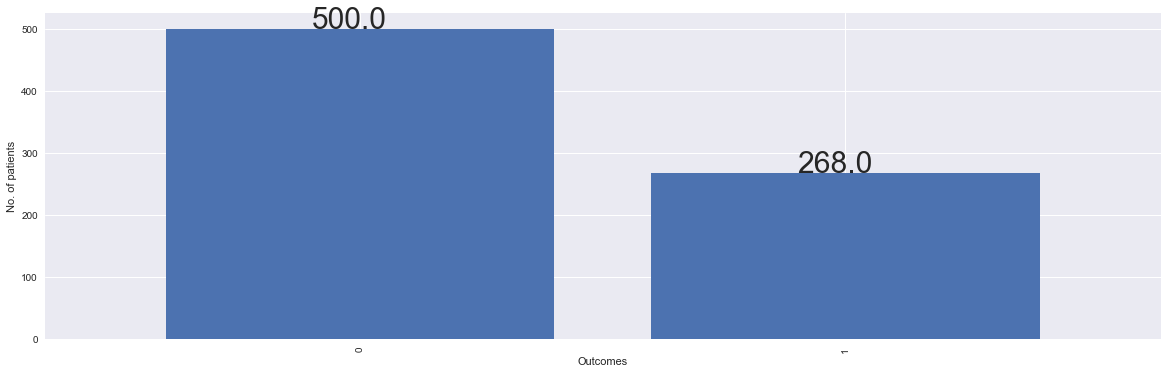

In [25]:
# Visualize number of different classes 


ax = plt.subplots(figsize=(20,6))
ax = Diabetes['Outcome'].value_counts().plot(kind='bar', width=0.8)
ax.set_xlabel('Outcomes')
ax.set_ylabel('No. of patients')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.3,p.get_height()+0.1), fontsize=30)
plt.show()

In [10]:
# For curve fittng 
from scipy import stats 
% matplotlib inline 

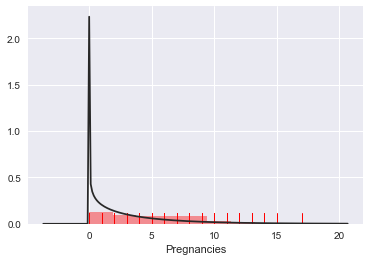

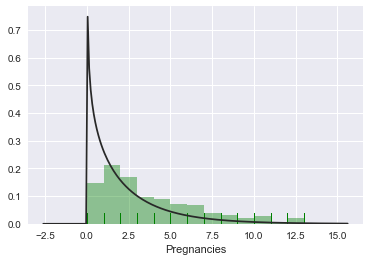

In [11]:
# Density of Prenancies 
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
sns.distplot(Positives['Pregnancies'], rug=True, kde=False, color='r', fit=stats.gamma, ax=ax1)
sns.distplot(Negatives['Pregnancies'], rug=True, kde=False, color='g', fit=stats.gamma, ax=ax2)

In [12]:
# From above it could be noted that there is little between having Diabetes to pregnancies.

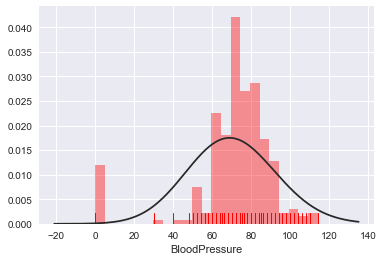

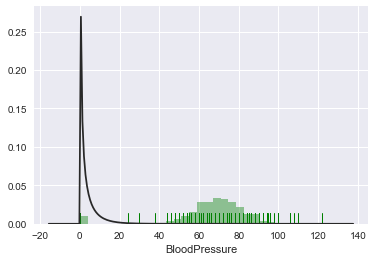

In [13]:
# Density of Blood Pressure 
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
sns.distplot(Positives['BloodPressure'], rug=True, kde=False, color='r', fit=stats.gamma, ax=ax1)
sns.distplot(Negatives['BloodPressure'], rug=True, kde=False, color='g', fit=stats.gamma, ax=ax2)

In [14]:
# From above graph we can say, blood pressure is highly correlated with getting diabetes 

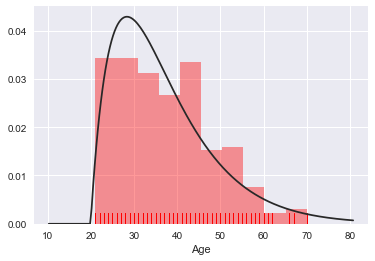

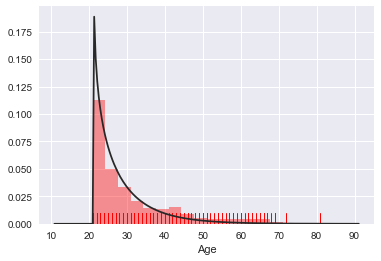

In [15]:
#Density of Age 
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
sns.distplot(Positives['Age'], rug=True, kde=False, color='r', fit=stats.gamma, ax=ax1)
sns.distplot(Negatives['Age'], rug=True, kde=False, color='r', fit=stats.gamma, ax=ax2)

In [16]:
# Age shows a great correlation with chances of diabetes 

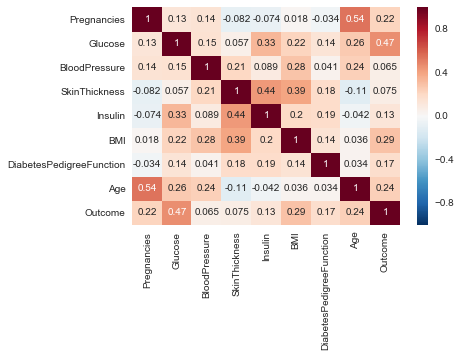

In [17]:
# Correlation between variables 
Corr = Diabetes[Diabetes.columns].corr()
sns.heatmap(Corr, annot=True)

## Predictive modelling 

In [26]:
Diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [28]:
# Importing required libraries for machine learning algorithms 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score 
from sklearn import tree

In [30]:
# Naive Bayes Algorithm 
gNB = GaussianNB()
scores = cross_val_score(gNB, M_Diabetes, Outcome, cv=5)
print("Accuracy : ", scores.mean())

Accuracy :  0.751336898396


In [33]:
# K Nearest Neighbors Algorithm 
scores = []

for i in range(1,31):
    neighbor = KNeighborsClassifier(n_neighbors=i)
    scores.append(cross_val_score(neighbor, M_Diabetes, Outcome, cv=5).mean())
    
max_a=0
k_max = 0

for i in range(0, 30):
    if(scores[i] >= max_a):
        max_a = scores[i]
        if(i>k_max):
            k_max=i
            
print("K is maximum in Knn for ", k_max, " with a accuracy of ", max_a)            

K is maximum in Knn for  13  with a accuracy of  0.757855869621


In [34]:
# Support Vector Machine

In [35]:
# Linear Kernel 
clf = svm.SVC(kernel = 'linear')
print("Accuracy : ", cross_val_score(clf, M_Diabetes, Outcome, cv=5).mean())

Accuracy :  0.765682030388


In [36]:
# RBF Kernel 
clf_r = svm.SVC(kernel = 'rbf')
print("Accuracy : ", cross_val_score(clf, M_Diabetes, Outcome, cv=5).mean())

Accuracy :  0.765682030388


In [38]:
# Decision Tree 
from sklearn import tree
cl = tree.DecisionTreeClassifier()
print("Accuracy : ", cross_val_score(cl, M_Diabetes, Outcome, cv=5).mean())

Accuracy :  0.712401324166


In [40]:
# Random Forest 
Rf = RandomForestClassifier()
print("Accuracy : ", cross_val_score(Rf, M_Diabetes, Outcome, cv=5).mean())

Accuracy :  0.744843391902


In [41]:
# Artificial Neural Network 
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [42]:
Numpy_Matrix = M_Diabetes.as_matrix()
Numpy_Outcome = Outcome.as_matrix()

In [44]:
K_fold = StratifiedKFold(n_splits=4, shuffle = True)
cv_scores = []

for train, test in K_fold.split(M_Diabetes, Outcome):
    
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_dim = 8))
    model.add(Dense(12, activation = 'relu', input_dim = 8))
    model.add(Dense(12, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])
    model.fit(Numpy_Matrix[train], Numpy_Outcome[train], epochs = 400, batch_size = 32)
    
    scores = model.evaluate(Numpy_Matrix[test], Numpy_Outcome[test])
    cv_scores.append(scores[1]*100)

Epoch 1/400
576/576 [==============================] - 0s - loss: 4.9530 - acc: 0.6510      
Epoch 2/400
576/576 [==============================] - 0s - loss: 3.0277 - acc: 0.6580     
Epoch 3/400
576/576 [==============================] - 0s - loss: 1.2779 - acc: 0.5035     
Epoch 4/400
576/576 [==============================] - 0s - loss: 0.8193 - acc: 0.6163     
Epoch 5/400
576/576 [==============================] - 0s - loss: 0.7128 - acc: 0.5972     
Epoch 6/400
576/576 [==============================] - 0s - loss: 0.6854 - acc: 0.6615     
Epoch 7/400
576/576 [==============================] - 0s - loss: 0.6626 - acc: 0.6840     
Epoch 8/400
576/576 [==============================] - 0s - loss: 0.6568 - acc: 0.6632     
Epoch 9/400
576/576 [==============================] - 0s - loss: 0.6399 - acc: 0.6719     
Epoch 10/400
576/576 [==============================] - 0s - loss: 0.6331 - acc: 0.6875     
Epoch 11/400
576/576 [==============================] - 0s - loss: 0.6365 - ac

576/576 [==============================] - 0s - loss: 0.5261 - acc: 0.7448     
Epoch 89/400
576/576 [==============================] - 0s - loss: 0.5231 - acc: 0.7448     
Epoch 90/400
576/576 [==============================] - 0s - loss: 0.5273 - acc: 0.7413     
Epoch 91/400
576/576 [==============================] - 0s - loss: 0.5300 - acc: 0.7465     
Epoch 92/400
576/576 [==============================] - 0s - loss: 0.5256 - acc: 0.7483     
Epoch 93/400
576/576 [==============================] - 0s - loss: 0.5311 - acc: 0.7396     
Epoch 94/400
576/576 [==============================] - 0s - loss: 0.5341 - acc: 0.7344     
Epoch 95/400
576/576 [==============================] - 0s - loss: 0.5301 - acc: 0.7431     
Epoch 96/400
576/576 [==============================] - 0s - loss: 0.5194 - acc: 0.7500     
Epoch 97/400
576/576 [==============================] - 0s - loss: 0.5243 - acc: 0.7396     
Epoch 98/400
576/576 [==============================] - 0s - loss: 0.5354 - acc: 0.

576/576 [==============================] - 0s - loss: 0.4834 - acc: 0.7691     
Epoch 176/400
576/576 [==============================] - 0s - loss: 0.4946 - acc: 0.7830     
Epoch 177/400
576/576 [==============================] - 0s - loss: 0.4883 - acc: 0.7656     
Epoch 178/400
576/576 [==============================] - 0s - loss: 0.4902 - acc: 0.7708     
Epoch 179/400
576/576 [==============================] - 0s - loss: 0.4865 - acc: 0.7674     
Epoch 180/400
576/576 [==============================] - 0s - loss: 0.4825 - acc: 0.7969     
Epoch 181/400
576/576 [==============================] - 0s - loss: 0.4813 - acc: 0.7882     
Epoch 182/400
576/576 [==============================] - 0s - loss: 0.4847 - acc: 0.7708     
Epoch 183/400
576/576 [==============================] - 0s - loss: 0.4819 - acc: 0.7656     
Epoch 184/400
576/576 [==============================] - 0s - loss: 0.5036 - acc: 0.7830     
Epoch 185/400
576/576 [==============================] - 0s - loss: 0.4867

576/576 [==============================] - 0s - loss: 0.4387 - acc: 0.8003     
Epoch 262/400
576/576 [==============================] - 0s - loss: 0.4355 - acc: 0.8038     
Epoch 263/400
576/576 [==============================] - 0s - loss: 0.4365 - acc: 0.7969     
Epoch 264/400
576/576 [==============================] - 0s - loss: 0.4347 - acc: 0.8038     
Epoch 265/400
576/576 [==============================] - 0s - loss: 0.4423 - acc: 0.8108     
Epoch 266/400
576/576 [==============================] - 0s - loss: 0.4440 - acc: 0.8038     
Epoch 267/400
576/576 [==============================] - 0s - loss: 0.4408 - acc: 0.8090     
Epoch 268/400
576/576 [==============================] - 0s - loss: 0.4497 - acc: 0.7812     
Epoch 269/400
576/576 [==============================] - 0s - loss: 0.4507 - acc: 0.7969     
Epoch 270/400
576/576 [==============================] - 0s - loss: 0.4343 - acc: 0.8038     
Epoch 271/400
576/576 [==============================] - 0s - loss: 0.4427

576/576 [==============================] - 0s - loss: 0.4267 - acc: 0.8056     
Epoch 348/400
576/576 [==============================] - 0s - loss: 0.4141 - acc: 0.8090     
Epoch 349/400
576/576 [==============================] - 0s - loss: 0.4215 - acc: 0.8021     
Epoch 350/400
576/576 [==============================] - 0s - loss: 0.4185 - acc: 0.8142     
Epoch 351/400
576/576 [==============================] - 0s - loss: 0.4066 - acc: 0.8142     
Epoch 352/400
576/576 [==============================] - 0s - loss: 0.4234 - acc: 0.7951     
Epoch 353/400
576/576 [==============================] - 0s - loss: 0.4121 - acc: 0.8281     
Epoch 354/400
576/576 [==============================] - 0s - loss: 0.4292 - acc: 0.7917     
Epoch 355/400
576/576 [==============================] - 0s - loss: 0.4286 - acc: 0.8021     
Epoch 356/400
576/576 [==============================] - 0s - loss: 0.4180 - acc: 0.7986     
Epoch 357/400
576/576 [==============================] - 0s - loss: 0.4181

576/576 [==============================] - 0s - loss: 0.6066 - acc: 0.6736     
Epoch 34/400
576/576 [==============================] - 0s - loss: 0.5906 - acc: 0.6701     
Epoch 35/400
576/576 [==============================] - 0s - loss: 0.6116 - acc: 0.6667     
Epoch 36/400
576/576 [==============================] - 0s - loss: 0.6362 - acc: 0.6788     
Epoch 37/400
576/576 [==============================] - 0s - loss: 0.6029 - acc: 0.6649     
Epoch 38/400
576/576 [==============================] - 0s - loss: 0.5863 - acc: 0.6910     
Epoch 39/400
576/576 [==============================] - 0s - loss: 0.6037 - acc: 0.6823     
Epoch 40/400
576/576 [==============================] - 0s - loss: 0.5734 - acc: 0.7049     
Epoch 41/400
576/576 [==============================] - 0s - loss: 0.5820 - acc: 0.6858     
Epoch 42/400
576/576 [==============================] - 0s - loss: 0.5777 - acc: 0.6979     
Epoch 43/400
576/576 [==============================] - 0s - loss: 0.5814 - acc: 0.

576/576 [==============================] - 0s - loss: 0.5072 - acc: 0.7465     
Epoch 122/400
576/576 [==============================] - 0s - loss: 0.5256 - acc: 0.7396     
Epoch 123/400
576/576 [==============================] - 0s - loss: 0.5556 - acc: 0.7135     
Epoch 124/400
576/576 [==============================] - 0s - loss: 0.5185 - acc: 0.7483     
Epoch 125/400
576/576 [==============================] - 0s - loss: 0.5100 - acc: 0.7483     
Epoch 126/400
576/576 [==============================] - 0s - loss: 0.5052 - acc: 0.7517     
Epoch 127/400
576/576 [==============================] - 0s - loss: 0.5077 - acc: 0.7535     
Epoch 128/400
576/576 [==============================] - 0s - loss: 0.5224 - acc: 0.7483     
Epoch 129/400
576/576 [==============================] - 0s - loss: 0.5866 - acc: 0.7292     
Epoch 130/400
576/576 [==============================] - 0s - loss: 0.5774 - acc: 0.7292     
Epoch 131/400
576/576 [==============================] - 0s - loss: 0.5288

576/576 [==============================] - 0s - loss: 0.4873 - acc: 0.7552     
Epoch 208/400
576/576 [==============================] - 0s - loss: 0.4670 - acc: 0.7778     
Epoch 209/400
576/576 [==============================] - 0s - loss: 0.4656 - acc: 0.7743     
Epoch 210/400
576/576 [==============================] - 0s - loss: 0.4642 - acc: 0.7726     
Epoch 211/400
576/576 [==============================] - 0s - loss: 0.4655 - acc: 0.7795     
Epoch 212/400
576/576 [==============================] - 0s - loss: 0.4667 - acc: 0.7726     
Epoch 213/400
576/576 [==============================] - 0s - loss: 0.4825 - acc: 0.7760     
Epoch 214/400
576/576 [==============================] - 0s - loss: 0.4656 - acc: 0.7830     
Epoch 215/400
576/576 [==============================] - 0s - loss: 0.4697 - acc: 0.7587     
Epoch 216/400
576/576 [==============================] - 0s - loss: 0.4722 - acc: 0.7812     
Epoch 217/400
576/576 [==============================] - 0s - loss: 0.4848

576/576 [==============================] - 0s - loss: 0.4785 - acc: 0.7674     
Epoch 294/400
576/576 [==============================] - 0s - loss: 0.4454 - acc: 0.7882     
Epoch 295/400
576/576 [==============================] - 0s - loss: 0.4546 - acc: 0.7778     
Epoch 296/400
576/576 [==============================] - 0s - loss: 0.4401 - acc: 0.7951     
Epoch 297/400
576/576 [==============================] - 0s - loss: 0.4408 - acc: 0.7882     
Epoch 298/400
576/576 [==============================] - 0s - loss: 0.4407 - acc: 0.7847     
Epoch 299/400
576/576 [==============================] - 0s - loss: 0.4666 - acc: 0.7830     
Epoch 300/400
576/576 [==============================] - 0s - loss: 0.4447 - acc: 0.7830     
Epoch 301/400
576/576 [==============================] - 0s - loss: 0.4457 - acc: 0.7865     
Epoch 302/400
576/576 [==============================] - 0s - loss: 0.4421 - acc: 0.7812     
Epoch 303/400
576/576 [==============================] - 0s - loss: 0.4407

576/576 [==============================] - 0s - loss: 0.4199 - acc: 0.8056     
Epoch 381/400
576/576 [==============================] - 0s - loss: 0.4133 - acc: 0.8142     
Epoch 382/400
576/576 [==============================] - 0s - loss: 0.4079 - acc: 0.8142     
Epoch 383/400
576/576 [==============================] - 0s - loss: 0.4060 - acc: 0.8229     
Epoch 384/400
576/576 [==============================] - 0s - loss: 0.4088 - acc: 0.8056     
Epoch 385/400
576/576 [==============================] - 0s - loss: 0.4102 - acc: 0.8090     
Epoch 386/400
576/576 [==============================] - 0s - loss: 0.4092 - acc: 0.8142     
Epoch 387/400
576/576 [==============================] - 0s - loss: 0.4166 - acc: 0.7917     
Epoch 388/400
576/576 [==============================] - 0s - loss: 0.4369 - acc: 0.7865     
Epoch 389/400
576/576 [==============================] - 0s - loss: 0.4413 - acc: 0.7865     
Epoch 390/400
576/576 [==============================] - 0s - loss: 0.4359

576/576 [==============================] - 0s - loss: 0.5505 - acc: 0.7396     
Epoch 67/400
576/576 [==============================] - 0s - loss: 0.5588 - acc: 0.7170     
Epoch 68/400
576/576 [==============================] - 0s - loss: 0.5458 - acc: 0.7431     
Epoch 69/400
576/576 [==============================] - 0s - loss: 0.5485 - acc: 0.7344     
Epoch 70/400
576/576 [==============================] - 0s - loss: 0.5462 - acc: 0.7292     
Epoch 71/400
576/576 [==============================] - 0s - loss: 0.5419 - acc: 0.7396     
Epoch 72/400
576/576 [==============================] - 0s - loss: 0.5410 - acc: 0.7361     
Epoch 73/400
576/576 [==============================] - 0s - loss: 0.5403 - acc: 0.7309     
Epoch 74/400
576/576 [==============================] - 0s - loss: 0.5412 - acc: 0.7274     
Epoch 75/400
576/576 [==============================] - 0s - loss: 0.5412 - acc: 0.7413     
Epoch 76/400
576/576 [==============================] - 0s - loss: 0.5367 - acc: 0.

576/576 [==============================] - 0s - loss: 0.4871 - acc: 0.7708     
Epoch 154/400
576/576 [==============================] - 0s - loss: 0.4899 - acc: 0.7674     
Epoch 155/400
576/576 [==============================] - 0s - loss: 0.4847 - acc: 0.7639     
Epoch 156/400
576/576 [==============================] - 0s - loss: 0.4913 - acc: 0.7569     
Epoch 157/400
576/576 [==============================] - 0s - loss: 0.4905 - acc: 0.7691     
Epoch 158/400
576/576 [==============================] - 0s - loss: 0.4982 - acc: 0.7483     
Epoch 159/400
576/576 [==============================] - 0s - loss: 0.4842 - acc: 0.7726     
Epoch 160/400
576/576 [==============================] - 0s - loss: 0.4842 - acc: 0.7743     
Epoch 161/400
576/576 [==============================] - 0s - loss: 0.4822 - acc: 0.7743     
Epoch 162/400
576/576 [==============================] - 0s - loss: 0.4883 - acc: 0.7622     
Epoch 163/400
576/576 [==============================] - 0s - loss: 0.4893

576/576 [==============================] - 0s - loss: 0.4566 - acc: 0.7882     
Epoch 240/400
576/576 [==============================] - 0s - loss: 0.4559 - acc: 0.7830     
Epoch 241/400
576/576 [==============================] - 0s - loss: 0.4578 - acc: 0.7760     
Epoch 242/400
576/576 [==============================] - 0s - loss: 0.4625 - acc: 0.7691     
Epoch 243/400
576/576 [==============================] - 0s - loss: 0.4550 - acc: 0.7795     
Epoch 244/400
576/576 [==============================] - 0s - loss: 0.4548 - acc: 0.7778     
Epoch 245/400
576/576 [==============================] - 0s - loss: 0.4563 - acc: 0.7812     
Epoch 246/400
576/576 [==============================] - 0s - loss: 0.4522 - acc: 0.7812     
Epoch 247/400
576/576 [==============================] - 0s - loss: 0.4515 - acc: 0.7899     
Epoch 248/400
576/576 [==============================] - 0s - loss: 0.4555 - acc: 0.7708     
Epoch 249/400
576/576 [==============================] - 0s - loss: 0.4550

576/576 [==============================] - 0s - loss: 0.4457 - acc: 0.7899     
Epoch 327/400
576/576 [==============================] - 0s - loss: 0.4366 - acc: 0.7899     
Epoch 328/400
576/576 [==============================] - 0s - loss: 0.4345 - acc: 0.7934     
Epoch 329/400
576/576 [==============================] - 0s - loss: 0.4344 - acc: 0.7865     
Epoch 330/400
576/576 [==============================] - 0s - loss: 0.4333 - acc: 0.7917     
Epoch 331/400
576/576 [==============================] - 0s - loss: 0.4370 - acc: 0.7899     
Epoch 332/400
576/576 [==============================] - 0s - loss: 0.4370 - acc: 0.7899     
Epoch 333/400
576/576 [==============================] - 0s - loss: 0.4347 - acc: 0.7899     
Epoch 334/400
576/576 [==============================] - 0s - loss: 0.4390 - acc: 0.7795     
Epoch 335/400
576/576 [==============================] - 0s - loss: 0.4325 - acc: 0.7917     
Epoch 336/400
576/576 [==============================] - 0s - loss: 0.4378

576/576 [==============================] - 0s - loss: 0.6939 - acc: 0.6424     
Epoch 14/400
576/576 [==============================] - 0s - loss: 0.6672 - acc: 0.6528     
Epoch 15/400
576/576 [==============================] - 0s - loss: 0.6510 - acc: 0.6736     
Epoch 16/400
576/576 [==============================] - 0s - loss: 0.6506 - acc: 0.6545     
Epoch 17/400
576/576 [==============================] - 0s - loss: 0.6467 - acc: 0.6649     
Epoch 18/400
576/576 [==============================] - 0s - loss: 0.6212 - acc: 0.6736     
Epoch 19/400
576/576 [==============================] - 0s - loss: 0.6163 - acc: 0.6719     
Epoch 20/400
576/576 [==============================] - 0s - loss: 0.6029 - acc: 0.6736     
Epoch 21/400
576/576 [==============================] - 0s - loss: 0.6225 - acc: 0.6823     
Epoch 22/400
576/576 [==============================] - 0s - loss: 0.6259 - acc: 0.6632     
Epoch 23/400
576/576 [==============================] - 0s - loss: 0.6202 - acc: 0.

576/576 [==============================] - 0s - loss: 0.5787 - acc: 0.7153     
Epoch 101/400
576/576 [==============================] - 0s - loss: 0.5240 - acc: 0.7535     
Epoch 102/400
576/576 [==============================] - 0s - loss: 0.5149 - acc: 0.7448     
Epoch 103/400
576/576 [==============================] - 0s - loss: 0.5052 - acc: 0.7535     
Epoch 104/400
576/576 [==============================] - 0s - loss: 0.5138 - acc: 0.7292     
Epoch 105/400
576/576 [==============================] - 0s - loss: 0.5016 - acc: 0.7431     
Epoch 106/400
576/576 [==============================] - 0s - loss: 0.4980 - acc: 0.7604     
Epoch 107/400
576/576 [==============================] - 0s - loss: 0.4935 - acc: 0.7639     
Epoch 108/400
576/576 [==============================] - 0s - loss: 0.4964 - acc: 0.7604     
Epoch 109/400
576/576 [==============================] - 0s - loss: 0.5255 - acc: 0.7292     
Epoch 110/400
576/576 [==============================] - 0s - loss: 0.4855

576/576 [==============================] - 0s - loss: 0.4578 - acc: 0.7743     
Epoch 188/400
576/576 [==============================] - 0s - loss: 0.4679 - acc: 0.7691     
Epoch 189/400
576/576 [==============================] - 0s - loss: 0.4695 - acc: 0.7726     
Epoch 190/400
576/576 [==============================] - 0s - loss: 0.4722 - acc: 0.7917     
Epoch 191/400
576/576 [==============================] - 0s - loss: 0.5186 - acc: 0.7483     
Epoch 192/400
576/576 [==============================] - 0s - loss: 0.5140 - acc: 0.7396     
Epoch 193/400
576/576 [==============================] - 0s - loss: 0.4601 - acc: 0.7760     
Epoch 194/400
576/576 [==============================] - 0s - loss: 0.5181 - acc: 0.7344     
Epoch 195/400
576/576 [==============================] - 0s - loss: 0.4839 - acc: 0.7569     
Epoch 196/400
576/576 [==============================] - 0s - loss: 0.4600 - acc: 0.7778     
Epoch 197/400
576/576 [==============================] - 0s - loss: 0.4660

576/576 [==============================] - 0s - loss: 0.4701 - acc: 0.7674     
Epoch 274/400
576/576 [==============================] - 0s - loss: 0.4478 - acc: 0.7830     
Epoch 275/400
576/576 [==============================] - 0s - loss: 0.4696 - acc: 0.7743     
Epoch 276/400
576/576 [==============================] - 0s - loss: 0.4496 - acc: 0.7951     
Epoch 277/400
576/576 [==============================] - 0s - loss: 0.4592 - acc: 0.7795     
Epoch 278/400
576/576 [==============================] - ETA: 0s - loss: 0.4738 - acc: 0.767 - 0s - loss: 0.4658 - acc: 0.7778     
Epoch 279/400
576/576 [==============================] - 0s - loss: 0.4429 - acc: 0.7899     
Epoch 280/400
576/576 [==============================] - ETA: 0s - loss: 0.4370 - acc: 0.798 - 0s - loss: 0.4529 - acc: 0.7847     
Epoch 281/400
576/576 [==============================] - 0s - loss: 0.4553 - acc: 0.7795     
Epoch 282/400
576/576 [==============================] - 0s - loss: 0.4570 - acc: 0.7760    

576/576 [==============================] - 0s - loss: 0.4513 - acc: 0.7899     
Epoch 360/400
576/576 [==============================] - 0s - loss: 0.4603 - acc: 0.7743     
Epoch 361/400
576/576 [==============================] - 0s - loss: 0.4401 - acc: 0.7951     
Epoch 362/400
576/576 [==============================] - 0s - loss: 0.4294 - acc: 0.7917     
Epoch 363/400
576/576 [==============================] - 0s - loss: 0.4403 - acc: 0.7934     
Epoch 364/400
576/576 [==============================] - 0s - loss: 0.4308 - acc: 0.7847     
Epoch 365/400
576/576 [==============================] - 0s - loss: 0.4365 - acc: 0.7917     
Epoch 366/400
576/576 [==============================] - 0s - loss: 0.4489 - acc: 0.8021     
Epoch 367/400
576/576 [==============================] - 0s - loss: 0.4389 - acc: 0.8003     
Epoch 368/400
576/576 [==============================] - ETA: 0s - loss: 0.4197 - acc: 0.788 - 0s - loss: 0.4256 - acc: 0.7934     
Epoch 369/400
576/576 [=============

In [47]:
def Mean(Scores):
    Sum =0 
    for i in Scores:
        Sum+=i 
        
    return(Sum/len(Scores))

In [48]:
print(Mean(cv_scores))

74.21875


In [49]:
# Learning algorithm with best accuracy is linear SVM 

In [51]:
# Eliminating irrelevant features using correlation matrix 
Corr.mean()

Pregnancies                 0.207326
Glucose                     0.306582
BloodPressure               0.246427
SkinThickness               0.239677
Insulin                     0.250539
BMI                         0.286731
DiabetesPedigreeFunction    0.206903
Age                         0.244379
Outcome                     0.295971
dtype: float64

In [53]:
Data_P = Diabetes 
Data_P.drop('Pregnancies', axis = 1, inplace = True)
Data_P.drop('Outcome', axis = 1, inplace = True)
clf = svm.SVC(kernel = 'linear')
print("Accuracy : ", cross_val_score(clf, Data_P, Outcome, cv=5).mean())

Accuracy :  0.776097105509


In [54]:
# it is founded that eliminating pregnancies feature resulted in a better accuracy. However,
# feature Diabetes Pedigree Function and both DPF and pregnancies resulted in same accuracy.

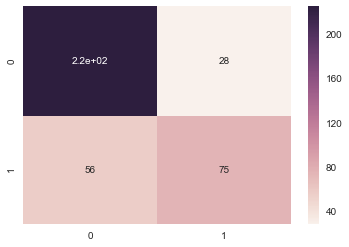

In [59]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(Data_P, Outcome, test_size = 0.5, random_state = 0)
clf.fit(x_train, y_train)
Confusion = confusion_matrix(y_test, clf.predict(x_test))
sns.heatmap(Confusion, annot = True,)

In [60]:
print(classification_report(y_test, clf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.80      0.89      0.84       253
          1       0.73      0.57      0.64       131

avg / total       0.78      0.78      0.77       384

